In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(101)
x = np.random.rand(100,1)-0.5
y= 3*x[:,0]**2 + 0.05 +np.random.randn(100)

In [5]:
df=pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y
df

,x,y
0,0.016399,-0.995973
1,0.070668,1.357746
2,-0.471526,-0.750504
3,-0.328478,-0.120401
4,0.185277,-0.009552
...,...,...
95,0.342219,1.299139
96,-0.115062,0.420584
97,0.051666,-1.005041
98,0.210538,0.057598


Text(0.5, 1.0, 'X vs Y')

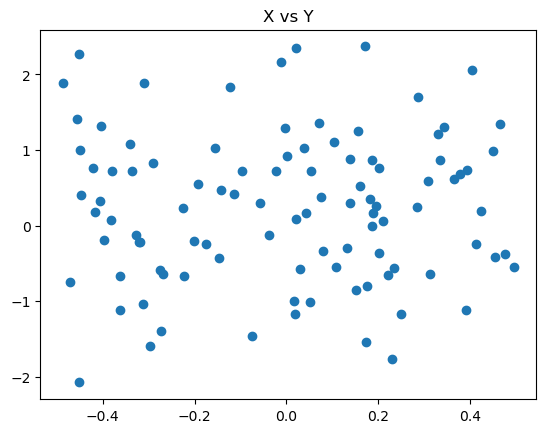

In [6]:
plt.scatter(df['x'],df['y'])
plt.title('X vs Y')

In [7]:
df['pred1'] = df['y'].mean()

In [8]:
df.head()

,x,y,pred1
0,0.016399,-0.995973,0.233664
1,0.070668,1.357746,0.233664
2,-0.471526,-0.750504,0.233664
3,-0.328478,-0.120401,0.233664
4,0.185277,-0.009552,0.233664


In [24]:
df['loss1'] = df['y']-df['pred1']

In [11]:
df.head()

,x,y,pred1,loss
0,0.016399,-0.995973,0.233664,-1.229637
1,0.070668,1.357746,0.233664,1.124082
2,-0.471526,-0.750504,0.233664,-0.984168
3,-0.328478,-0.120401,0.233664,-0.354065
4,0.185277,-0.009552,0.233664,-0.243216


Text(0.5, 1.0, 'X vs Y')

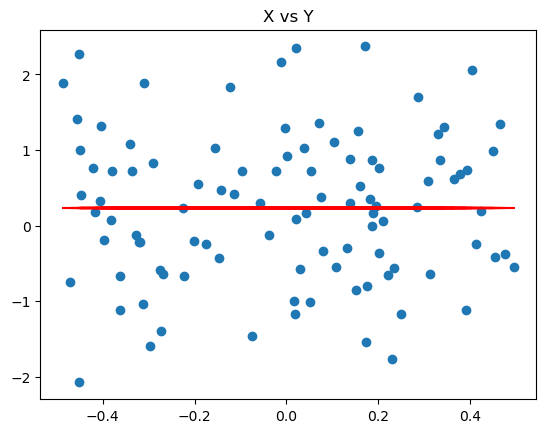

In [12]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['pred1'], color = 'red')
plt.title('X vs Y')

In [33]:
# build DT
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_leaf_nodes=8)
dt.fit(df['x'].values.reshape(100,1), df['loss1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

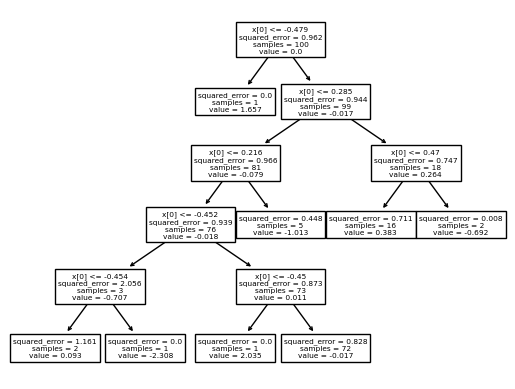

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

In [15]:
x_test = np.linspace(-0.5,0.5,500)

In [16]:
x_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [17]:
y_pred = 0.233+dt.predict(x_test.reshape(500,1))

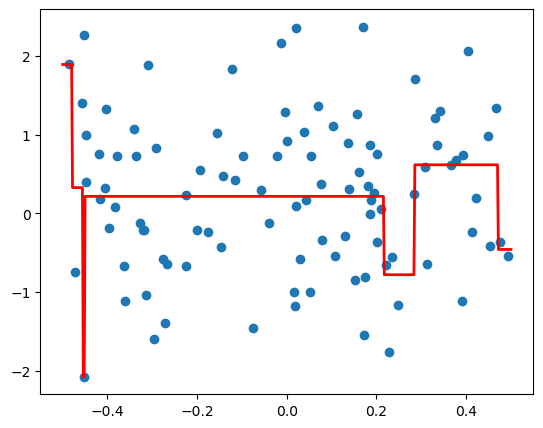

In [18]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x_test,y_pred, linewidth=2, color='red')
plt.scatter(df['x'],df['y'])

In [20]:
df['pred2'] = 0.233+dt.predict(df['x'].values.reshape(100,1))

In [21]:
df.head()

,x,y,pred1,loss,pred2
0,0.016399,-0.995973,0.233664,-1.229637,0.215591
1,0.070668,1.357746,0.233664,1.124082,0.215591
2,-0.471526,-0.750504,0.233664,-0.984168,0.326326
3,-0.328478,-0.120401,0.233664,-0.354065,0.215591
4,0.185277,-0.009552,0.233664,-0.243216,0.215591


In [25]:
df['loss2'] = df['y']-df['pred2']
df.head()

,x,y,pred1,loss,pred2,loss1,loss2
0,0.016399,-0.995973,0.233664,-1.211563,0.215591,-1.229637,-1.211563
1,0.070668,1.357746,0.233664,1.142156,0.215591,1.124082,1.142156
2,-0.471526,-0.750504,0.233664,-1.076830,0.326326,-0.984168,-1.076830
3,-0.328478,-0.120401,0.233664,-0.335992,0.215591,-0.354065,-0.335992
4,0.185277,-0.009552,0.233664,-0.225143,0.215591,-0.243216,-0.225143


In [26]:
df.drop('loss', axis=1)

,x,y,pred1,pred2,loss1,loss2
0,0.016399,-0.995973,0.233664,0.215591,-1.229637,-1.211563
1,0.070668,1.357746,0.233664,0.215591,1.124082,1.142156
2,-0.471526,-0.750504,0.233664,0.326326,-0.984168,-1.076830
3,-0.328478,-0.120401,0.233664,0.215591,-0.354065,-0.335992
4,0.185277,-0.009552,0.233664,0.215591,-0.243216,-0.225143
...,...,...,...,...,...,...
95,0.342219,1.299139,0.233664,0.616136,1.065475,0.683003
96,-0.115062,0.420584,0.233664,0.215591,0.186920,0.204993
97,0.051666,-1.005041,0.233664,0.215591,-1.238705,-1.220631
98,0.210538,0.057598,0.233664,0.215591,-0.176066,-0.157992


In [34]:
dt1 = DecisionTreeRegressor(max_leaf_nodes=8)
dt1.fit(df['x'].values.reshape(100,1), df['loss2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [35]:
y_pred = 0.233 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in [dt, dt1])

Text(0.5, 1.0, 'X vs Y')

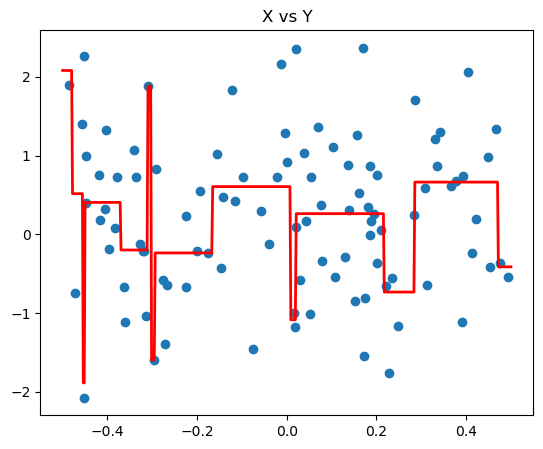

In [36]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x_test,y_pred, linewidth=2, color='red')
plt.scatter(df['x'],df['y'])
plt.title('X vs Y')